## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks, 改變 monitor "Validation Accuracy", 調整 earlystop 的等待次數至 10, 25 並比較結果
"""
# 載入 Callbacks, 並將 monitor 設定為監控 Validation Accuracy
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_acc", 
                          patience=10, 
                          verbose=1
                          )
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

C:\Users\EvaHung\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 3s 55us/step - loss: 1.7433 - accuracy: 0.3929 - val_loss: 1.9424 - val_accuracy: 0.3164
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6157 - accuracy: 0.4376 - val_loss: 1.8147 - val_accuracy: 0.3673
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5434 - accuracy: 0.4617 - val_loss: 1.7125 - val_accuracy: 0.4065
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4869 - accuracy: 0.4802 - val_loss: 1.6485 - val_accuracy: 0.4206
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4415 - accuracy: 0.4980 - val_loss: 1.5863 - val_accuracy: 0.4379
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.4023 - accuracy: 0.5121 - val_loss: 1.5569 - val_accuracy: 0.4439
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3662 - accuracy: 0.5245 - val_loss: 1.5173 - val

KeyError: 'acc'

In [8]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

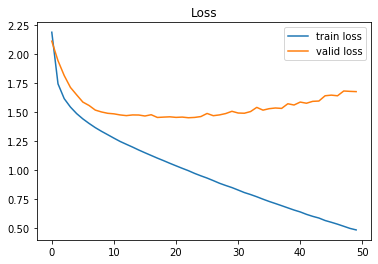

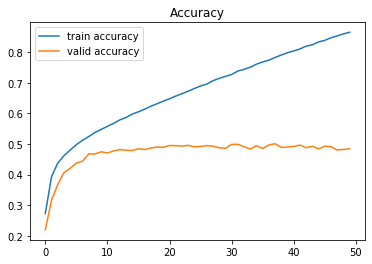

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
# 載入 Callbacks, 改變 monitor "Validation Accuracy", 調整 earlystop 的等待次數至 10, 25 並比較結果
"""
# 載入 Callbacks, 並將 monitor 設定為監控 Validation Accuracy
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_acc", 
                          patience=25, 
                          verbose=1
                          )
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512 

C:\Users\EvaHung\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 3s 54us/step - loss: 1.7325 - accuracy: 0.3971 - val_loss: 1.9742 - val_accuracy: 0.2778
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6074 - accuracy: 0.4379 - val_loss: 1.8072 - val_accuracy: 0.3759
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5366 - accuracy: 0.4640 - val_loss: 1.7190 - val_accuracy: 0.4036
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4811 - accuracy: 0.4838 - val_loss: 1.6358 - val_accuracy: 0.4343
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4373 - accuracy: 0.4987 - val_loss: 1.5788 - val_accuracy: 0.4424
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.3997 - accuracy: 0.5118 - val_loss: 1.5505 - val_accuracy: 0.4514
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.3655 - accuracy: 0.5242 - val_loss: 1.5276 - val

In [11]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

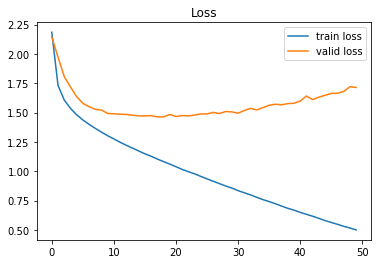

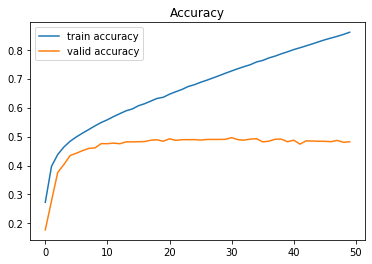

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()